

# **Multi-modal Large Language Model Tutorial**

_[Zichao Zeng](https://www.zengzichao.com/en/)_ – Multi-modal Large Language Model


*   An MLLM is an advanced neural network architecture designed to process and integrate multiple types of data modalities, such as text, images, audio, and video, enabling comprehensive understanding and reasoning across diverse input types.

*   MLLMs combine the strengths of language models (e.g., GPT) with visual or multimodal encoders (e.g., CLIP or Vision Transformers) to perform tasks that require both linguistic and visual understanding, such as captioning, visual question answering, and image-text retrieval.

*   These models are typically pre-trained on large-scale datasets containing aligned multimodal data, leveraging objectives like contrastive learning, masked prediction, or sequence modeling to learn cross-modal representations.

*   MLLMs are used in various domains, including augmented reality (AR), autonomous vehicles, healthcare, education, and creative industries, to provide richer insights and interactions by fusing information from different sources.

* They offer stronger generalisation, better contextual understanding, and finer-grained reasoning by leveraging complementary information from multiple modalities, surpassing the limitations of unimodal models.


## **CLIP: Learning Transferable Visual Models From Natural Language Supervision**


*   CLIP is the base model for the Big Visual Language Model, proposed by OpenAI in 2021.

*   CLIP spatially aligns the coding vectors of the models trained on each of images and text by learning from the comparison of massive amounts of weakly supervised image text pairs.



### Preparation for Colab

Prepare necessary packages for CLIP.




In [1]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.0 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-i6y93ail
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-i6y93ail
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=4d0e66609c71b446d3d3b663685a1a521aff70f90f0ddccb7813282a3df43ce4
  Stored in directory: /tmp/pip-ephem-wheel-cache-hsio9tt5/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


Prepare PyTorch environment for CLIP.

In [2]:
import torch
torch.__version__

'2.0.1+cu118'

GPU is alternative.

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Loading the Model

Import CLIP and check available models.

In [4]:
import clip
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

Load CLIP model - ViT-B/32

In [5]:
model, preprocess = clip.load('ViT-B/32', device)

100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 241MiB/s]


### Loading the Dataset

You can use your own image dataset in this step. \
Import 'requests' to capture the test image, and 'PIL' to visualise the image.

In [6]:
from PIL import Image
import requests

Load a test image which is a picture of UCL main campus.

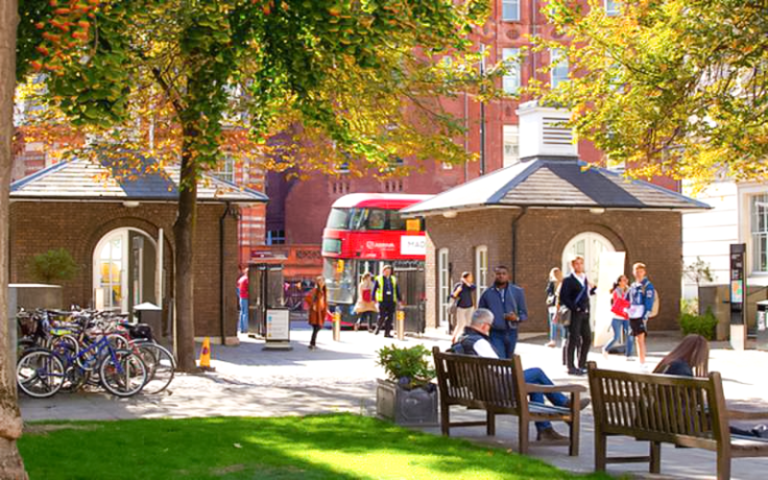

In [7]:
img_url = 'https://www.ucl.ac.uk/news/sites/news/files/styles/large_image/public/ucl_main_building.png?itok=fQHHwEaK'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
raw_image

100 possible classes of realistic scenes.  \
(You can input any class to test.)

In [8]:
classes = [
    "street",
    "campus",
    "underground",
    "beach",
    "mountain",
    "forest",
    "desert",
    "countryside",
    "city",
    "village",
    "park",
    "river",
    "lake",
    "ocean",
    "island",
    "airport",
    "train station",
    "subway station",
    "shopping mall",
    "cafe",
    "restaurant",
    "library",
    "museum",
    "zoo",
    "amusement park",
    "theater",
    "cinema",
    "stadium",
    "swimming pool",
    "garden",
    "farm",
    "factory",
    "church",
    "temple",
    "port",
    "bridge",
    "hotel",
    "hospital",
    "school",
    "university",
    "office",
    "construction site",
    "beach",
    "dam",
    "waterfall",
    "cave",
    "prairie",
    "swamp",
    "rainforest",
    "glacier"
]

### Building Features

CLIP use a case-insensitive tokenizer, which can be invoked using clip.tokenize(). By default, the outputs are padded to become 77 tokens long, which is what the CLIP models expects.

In [9]:
image_input = preprocess(raw_image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in classes]).to(device)

CLIP normalize the images, tokenize each text input, and run the forward pass of the model to get the image and text features.

In [10]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

### Calculating Cosine Similarity

CLIP normalize the features and calculate the dot product of each pair.

In [11]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(10)

### Predicting Image-Text Similarity

In [12]:
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{classes[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

          campus: 54.74%
      university: 22.50%
          school: 3.56%
            park: 2.74%
         library: 2.17%
            cafe: 1.83%
          garden: 1.78%
          street: 1.76%
   train station: 1.64%
        hospital: 1.42%


### Reference
https://openai.com/research/clip  
https://arxiv.org/abs/2103.00020  
https://github.com/openai/CLIP
